In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1="raw_data/city_data.csv"
file2="raw_data/ride_data.csv"
city=pd.read_csv(file1)
ride=pd.read_csv(file2)
ride.columns
city.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [3]:
grpCity=city.groupby(["city"])
grpCityDF=grpCity["driver_count"].sum()


In [4]:
grpRide = ride.groupby(["city"])
avgFare=round(grpRide["fare"].mean(),2)
sumRides=grpRide["ride_id"].count()
sumRides.head()

rideSum = pd.DataFrame({"Avg Fare":avgFare,"Total Rides":sumRides})
rideSum = rideSum.reset_index()
data=pd.merge(city,rideSum,on="city")
data.sort_values("Total Rides", ascending=False).head()

,city,driver_count,type,Avg Fare,Total Rides
48,Port Johnstad,22,Urban,25.88,34
28,Swansonbury,64,Urban,27.46,34
15,South Louis,12,Urban,27.09,32
84,Port James,15,Suburban,31.81,32
85,Port James,3,Suburban,31.81,32


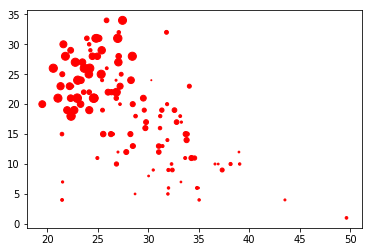

In [70]:
# X-Axis should be AVG Fare
# Y-Axis number of rides
# size of dot is driver count

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(data["Avg Fare"], data["Total Rides"], marker="o", facecolors="red", s=data["driver_count"])
plt.show()

In [64]:
totalFares = ride["fare"].sum()
totalRides = data["Total Rides"].sum()
totalDrivers = data["driver_count"].sum()

mrgCity=pd.merge(city,ride,on="city",how="left")
grpMrgCity=mrgCity.groupby(["type"])
fareCityType = grpMrgCity["fare"].sum()

dfFare=pd.DataFrame({"Fare":fareCityType})
dfFare = dfFare.reset_index()

dfFare["% Total Fares"]=dfFare["Fare"]/totalFares
dfFare

,type,Fare,% Total Fares
0,Rural,4255.09,0.066850
1,Suburban,20335.69,0.319486
2,Urban,40078.34,0.629655
